# RFM Analysis

## Dataset

### 1. Information 
The dataset is called Online Retail II and is a part of UCI machine learning repository and can be downloaded by following this [link](http://archive.ics.uci.edu/ml/datasets/Online+Retail+II). The  data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers. For the analysis purpose however, I will be only focusing on the transactions between the years 2010-11.

### 2. Attribute Information

* Invoice (Nominal): A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. 
* StockCode (Nominal): A 5-digit integral number uniquely assigned to each distinct product. 
* Description (Nominal): Product name
* Quantity (Numeric): The quantities of each product per transaction.
* InvoiceDate (datetime): The day and time when a transaction was generated. 
* Price (Numeric): Product price per unit in sterling (Â£). 
* CustomerID (Numeric): A 5-digit integral number uniquely assigned to each customer. 
* Country (Nominal): The name of the country where a customer resides.

### 3. RFM Analysis
RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall. Hence, it is a data driven customer behavior segmentation technique.


In [1]:
"Import required libraries"
#analysis libraries
import pandas as pd
import numpy as np
#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
#set graphic properties
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_style("whitegrid")

In [2]:
#read the excel file (reading .xlsx file requires openpyxl installation as xlrd does not support .xlsx)
o_retail = pd.read_excel('data/o_retail_two.xlsx', sheet_name="Year 2010-2011")

## 1. Summary of Dataset

In [3]:
o_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#null values percentage
round(o_retail.isnull().sum() * 100 / len(o_retail), 2)

Invoice         0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Customer ID    24.93
Country         0.00
dtype: float64

24.93% of the Customers do not have an unique id associated with them. In addition 0.27% of the products have missing product descriptions. Since RFM is a customer level analysis, these customers have to dropped. The missing product descrptions however, will not pose a problem.

In [5]:
#check for duplicate values
print("Count of duplicate rows in the online retail II dataset: " + str(o_retail.duplicated().sum()))

Count of duplicate rows in the online retail II dataset: 5268


In [6]:
#rename the CustomerId column
o_retail = o_retail.rename(columns={"Customer ID" : "CustomerID"})

In [7]:
#glimpse of duplicated values
o_retail[o_retail.duplicated()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [8]:
o_retail.query('StockCode == 21866 and CustomerID == 17908.0')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom


These duplicate values have to dropped in the data wrangling phase as there are a lot of them.

In [9]:
o_retail.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID            float64
Country                object
dtype: object

## 2. Data Cleaning

The focus of data cleaning is to drop null, duplicate values and clean out any other anomalies in the dataset.

In [10]:
#drop customers with null values for customer id
o_retail = o_retail[o_retail["CustomerID"].notna()]

In [11]:
#drop the duplicate values
o_retail = o_retail.drop_duplicates(keep='first')

In [12]:
print("Shape after filtering: " + str(o_retail.shape))
o_retail.head()

Shape after filtering: (401605, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
o_retail[o_retail.StockCode.str.match(pat='[0-9]{5}') == False].StockCode.unique()

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

## Analyse Unknown Stock Codes

In [14]:
#post
o_retail.query("StockCode == 'POST'").head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.0,12583.0,France
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.0,12791.0,Netherlands


Each of the StockCode has Description associated with it. For instance, POST means POSTAGE as we can observe above. Therefore instead, of manually verifying each of the code, I will write a function to get information about these unknown stock codes.

In [15]:
def get_code_desc(df):
    """
    Function to get the description for each of the assoicated stockcode.
    
    INPUT: 
        1. df(pandas dataframe): dataframe from which codes and descriptions
                                    can be extracted.
    
    OUTPUT:
        1. desc_df(pandas dataframe): dataframe with unknown codes and associated
                                        description value.
    """
    #get the list of unique items that are numeric
    uk_values = df[df.StockCode.str.match(pat='[0-9]{5}') == False] \
                    .StockCode.unique().tolist()
    
    #define a dataframe
    desc_df = pd.DataFrame(columns = ['StockCode'])
    desc_df['StockCode'] = uk_values
    
    #loop through the values
    desc_vals = [df[df['StockCode'] == u]['Description'].mode().values[0] 
                     for u in uk_values]
    #assign the values
    desc_df['Description'] = desc_vals
    
    return desc_df

In [16]:
get_code_desc(o_retail)

,StockCode,Description
0,POST,POSTAGE
1,D,Discount
2,C2,CARRIAGE
3,M,Manual
4,BANK CHARGES,Bank Charges
5,PADS,PADS TO MATCH ALL CUSHIONS
6,DOT,DOTCOM POSTAGE
7,CRUK,CRUK Commission


From the above descriptions it can be inferred that 'POST', 'C2', 'DOT', 'CRUK' and 'BANK CHARGES' are the charges associated with the retail company and not customers. The remaining charges i.e 'Discount', 'Manual', 'PADS' are associated with the customer revenue stream. Therefore, charges associated with the retail have to dropped as the analysis is related to customer.

In [17]:
#drop the values not associated with customers
bank_charges = ['POST', 'C2', 'DOT', 'CRUK','BANK CHARGES']
o_retail = o_retail[~o_retail['StockCode'].isin(bank_charges)]

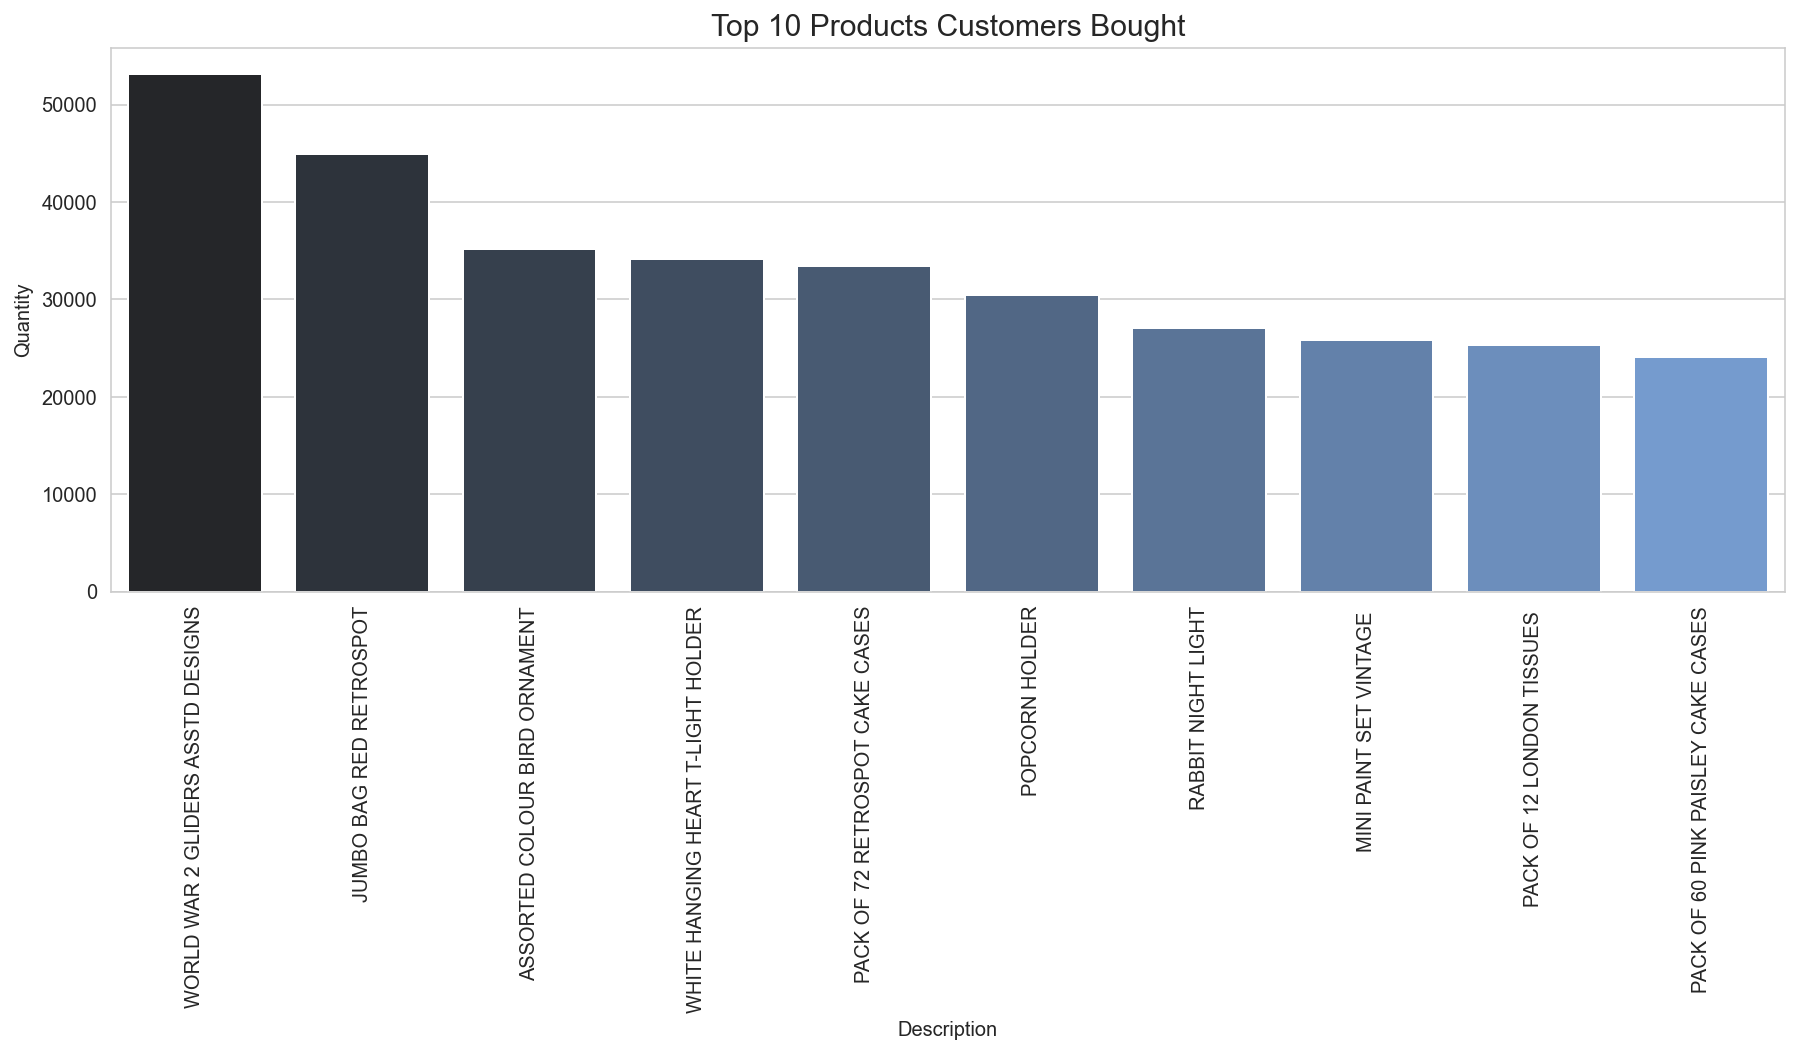

In [18]:
#top 10 products among the customers
top_products = o_retail.groupby("Description", as_index=False)['Quantity'] \
                        .sum() \
                        .sort_values(by = "Quantity", ascending = False)\
                        .head(10)
plt.figure(figsize=(15,5))
plt.title("Top 10 Products Customers Bought", fontsize = 15)
plt.xticks(rotation=90);
sns.barplot(
        data = top_products, 
        x="Description", 
        y="Quantity", 
        palette=sns.dark_palette("#69d", 10));

## 3. RFM

### 3.1 RFM Modeling

In order to calculate the Recency, Frequency and Monetary Value first the purchase size for each each row has to be calculate as well as the most recent date. In real world analysis, today's date will be used however, I will be using the latest date in the dataset as today's date.

In [19]:
#calculate the purchase size
o_retail['PurchaseSize'] = o_retail['Quantity'] * o_retail['Price']

In [20]:
date_today = o_retail['InvoiceDate'].max()
date_today

Timestamp('2011-12-09 12:50:00')

In [21]:
#calculate the Recency, Frequency & Monetary Value
rfm_df = o_retail.groupby("CustomerID").agg({'InvoiceDate': lambda x: (date_today - x.max()).days,
                                             'Invoice': 'nunique',
                                             'PurchaseSize': sum})

#rename the columns
rfm_df = rfm_df.rename(columns={
                        'InvoiceDate': 'Recency', 
                        'Invoice': 'Frequency', 
                        'PurchaseSize': 'Monetary Value'})

rfm_df.head()

,Recency,Frequency,Monetary Value
CustomerID,,,
12346.0,325,2,0.00
12347.0,1,7,4310.00
12348.0,74,4,1437.24
12349.0,18,1,1457.55
12350.0,309,1,294.40


### 3.2 RFM Quartiles

This steps with creating R, F, M scores for each customers. 

1. Recency score (R): Descending order from 4 all the way to 1 since higher the recency value the worse. For instance, the customer with 1 as the R score is bad however, the customer with 4 will be termed as good.

2. Frequency score (F): Ascending order from 1 to 4. Higher the score the better. For instance, customer with 1 as the F score falls in good group while the customer with 4 will be bad.

3. Monetary Score (M): Ascending order from 1 to 4, similar to F score.

In [22]:
#get the R score
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=4, labels=list(range(4, 0, -1)))

#get the F score
#Note: There are no unique bin edges, hence values will be ranked
rfm_df['F'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), q=4, labels=range(1,5))

#get the M score
rfm_df['M'] = pd.qcut(rfm_df['Monetary Value'], 4, labels=range(1,5))

rfm_df.head(3)

,Recency,Frequency,Monetary Value,R,F,M
CustomerID,,,,,,
12346.0,325,2,0.00,1,2,1
12347.0,1,7,4310.00,4,4,4
12348.0,74,4,1437.24,2,3,3


### 3.3 Generate RFM Scores

In [25]:
#RFM Segment
def concat_rfm(row):
    """
    Function to concat R, F, M as a single string and then into integer
    For instance, R = 1, F = 2, M = 1 will become 121.
    
    INPUT:
        1. row(pandas series): row of the rfm dataframe
        
    OUTPUT:
        1. rfm_concat(string): concatenated rfm string
    """
    #concatenate
    rfm_concat = str(row['R']) + str(row['F']) + str(row['M'])
    
    return rfm_concat

In [29]:
#concat rfm
rfm_df['RFM_Segment'] = rfm_df.apply(concat_rfm, axis=1)

#calculate the RFM score
rfm_df['RFM_Score'] = rfm_df[['R', 'F', 'M']].sum(axis=1)

rfm_df.head()

,Recency,Frequency,Monetary Value,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,2,0.00,1,2,1,121,4
12347.0,1,7,4310.00,4,4,4,444,12
12348.0,74,4,1437.24,2,3,3,233,8
12349.0,18,1,1457.55,3,1,3,313,7
12350.0,309,1,294.40,1,1,2,112,4


In [55]:
#find stats for RFM
rfm_df.groupby('RFM_Score').agg({
    'Recency': 'mean', 
    'Frequency': 'mean', 
    'Monetary Value': ['mean', 'count']}).round(2)

Recency Frequency Monetary Value      
             mean      mean           mean count
RFM_Score                                       
3          270.27      1.00         122.83   319
4          203.29      1.20         229.30   485
5          132.83      1.46         339.59   513
6           94.25      1.86         472.02   488
7           75.14      2.45         675.32   449
8           59.96      3.24         944.97   393
9           44.37      4.44        1294.51   446
10          30.57      5.84        1836.69   411
11          18.91      9.25        3539.47   370
12           5.85     18.68        8694.10   498

Based on the min and max of the rfm scores, the customers can be catgorized into 3 categories:

1. Top Customers(Top): RFM Score greater than 9 and equal to 12
2. Customer with Potential(Medium): RFM Score greater than 6 and equal to 9
3. Customers requiring attention(Low): RFM score between 3 and 6 inlclusive.

In [38]:
def rfm_categories(row):
    """
    Function to divide the customers into three categories
    based on RFM scores.
    
    INPUT:
        1. row(pandas series): row of the rfm dataframe
        
    OUTPUT:
        1. rfm_category(string): Top, Medium, Low based on the rfm score
    """
    #return category based on rfm
    if ((row['RFM_Score'] >= 3) and (row['RFM_Score'] <= 6)):
        return "Low"
    elif ((row['RFM_Score'] > 6) and (row['RFM_Score'] <= 9)):
        return "Medium"
    else:
        return "Top"

In [39]:
rfm_df['RFM_Categories'] = rfm_df.apply(rfm_categories, axis=1)
rfm_df.head()

,Recency,Frequency,Monetary Value,R,F,M,RFM_Segment,RFM_Score,RFM_Categories
CustomerID,,,,,,,,,
12346.0,325,2,0.00,1,2,1,121,4,Low
12347.0,1,7,4310.00,4,4,4,444,12,Top
12348.0,74,4,1437.24,2,3,3,233,8,Medium
12349.0,18,1,1457.55,3,1,3,313,7,Medium
12350.0,309,1,294.40,1,1,2,112,4,Low


### 3.4 RFM Analysis

In [60]:
rfm_df.groupby('RFM_Categories').agg({
            'Recency': 'mean', 
            'Frequency': 'mean', 
            'Monetary Value': ['mean', 'count']}).round(1)

Recency Frequency Monetary Value      
                  mean      mean           mean count
RFM_Categories                                       
Low              165.6       1.4          307.5  1805
Medium            59.9       3.4          972.0  1288
Top               17.6      11.8         4999.3  1279

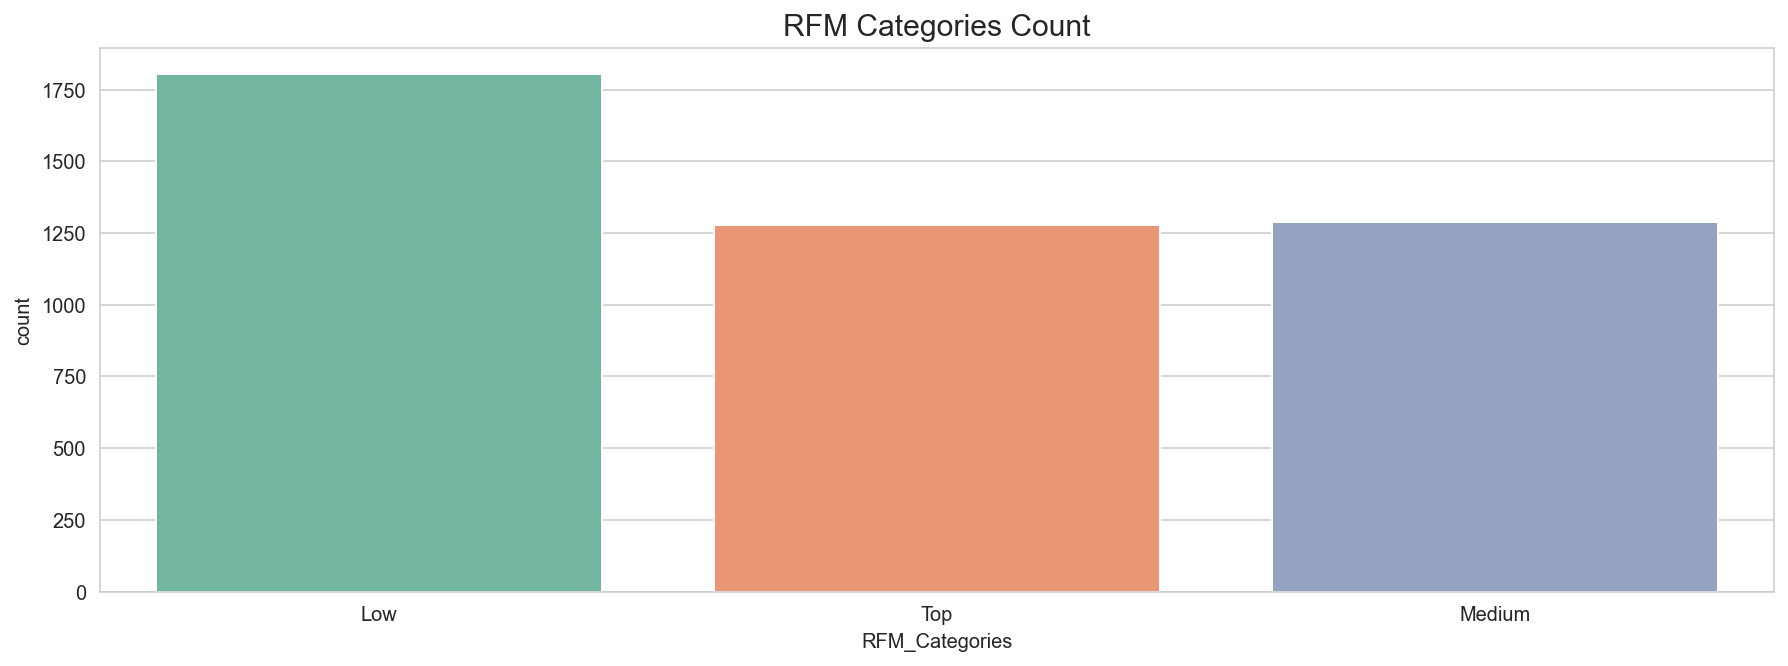

In [65]:
plt.figure(figsize=(15,5))
plt.title("RFM Categories Count", fontsize = 15)
sns.countplot(data = rfm_df, x="RFM_Categories", palette=sns.color_palette("Set2"));

In [51]:
#get customer per rfm_segment top 10
segment_cust = rfm_df.groupby("RFM_Segment")\
                        .size()\
                        .sort_values(ascending=False)\
                        .reset_index()\
                        .rename(columns={0 : "Num_Customers"})\
                        .head(10)\
                        
segment_cust.head()

,RFM_Segment,Num_Customers
0,444,498
1,111,319
2,344,209
3,333,183
4,121,181


In [53]:
#get the percentage of customers for each rfm_segment
segment_cust['Perc_Customers'] = round(
                                    segment_cust['Num_Customers'] / rfm_df.RFM_Segment.count(),3) \
                                    * 100
segment_cust

,RFM_Segment,Num_Customers,Perc_Customers
0,444,498,11.4
1,111,319,7.3
2,344,209,4.8
3,333,183,4.2
4,121,181,4.1
5,112,158,3.6
6,433,156,3.6
7,211,146,3.3
8,122,146,3.3
9,233,139,3.2


444 is the largest customer segment at 11.4% which also turns out to be the best group. In addtion, at second place is the 111 segment with 7.3% which as it turns out is also the worst customer base for online retail. 344 & 333 are also not bad customer segments at 3rd and 4th place.

In [68]:
#Export the data as csv for K-means segmentation
rfm_df.to_csv("data/rfm.csv")